# COMP9727 Recommender System
## Project: Anime Recommender System 
## Exploratory Data Analysis

@authors: 
- **WENG XINN CHOW (z5346077)**

@created on: **13th November 2023**

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import helper

### 2. Importing datasets

In [2]:
anime_file = "anime.csv"
rating_file = "rating.csv"

anime_df = pd.read_csv(anime_file)
rating_df = pd.read_csv(rating_file)

In [3]:
anime_df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [4]:
rating_df.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [5]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


### 3. Initial data cleansing

In [7]:
# Drop duplicates and missing values
anime_df = anime_df.drop_duplicates()
anime_df = anime_df.dropna()
anime_df = anime_df.reset_index(drop=True)

anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 657.3+ KB


In [8]:
rating_df = rating_df.drop_duplicates()
rating_df = rating_df.dropna()
rating_df = rating_df.reset_index(drop=True)

rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813736 entries, 0 to 7813735
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


### 4. Initial EDA

#### 4.1 Distribution of ratings in the rating dataset

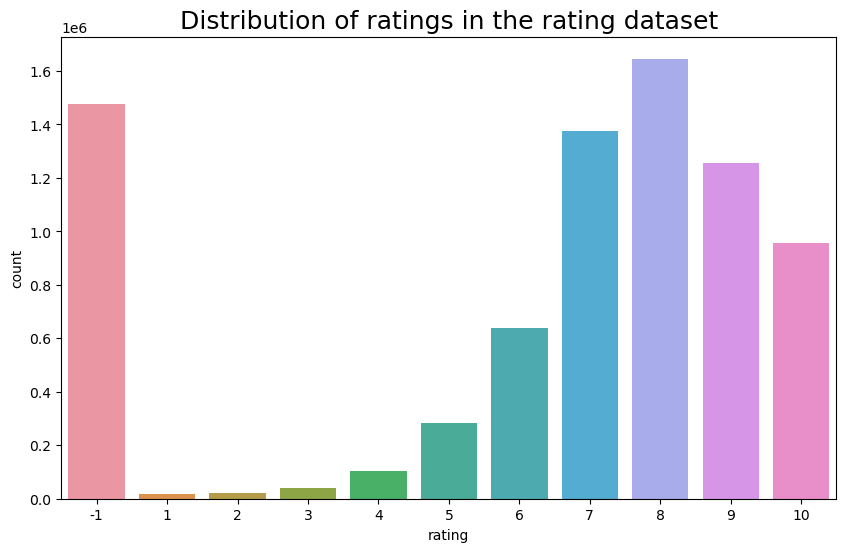

In [9]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(x="rating", data=rating_df)

plt.title(f"Distribution of ratings in the rating dataset", fontsize=18)
plt.show()

#### 4.2 Distribution of average ratings of animes in the anime dataset

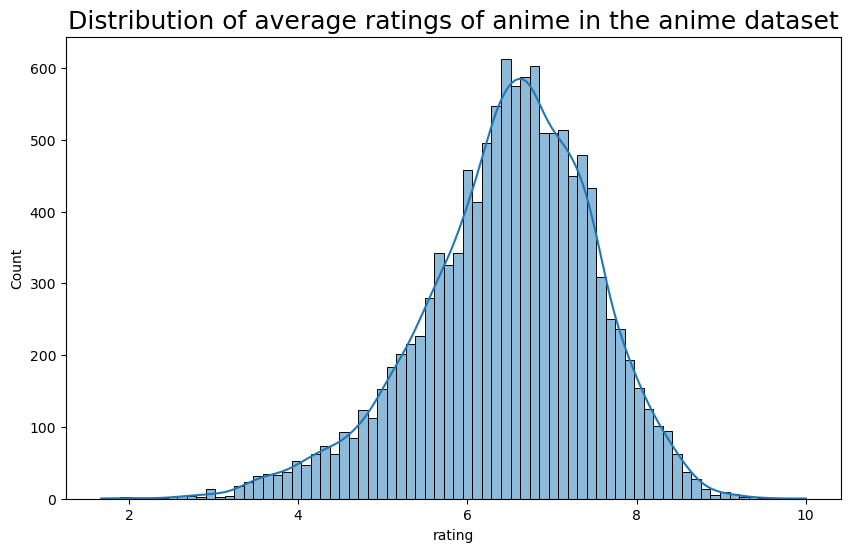

In [10]:
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(x="rating", data=anime_df, kde=True)

plt.title(f"Distribution of average ratings of anime in the anime dataset", fontsize=18)
plt.show()

### 5. Data preprocessing and feature extraction

#### 5.1 Anime dataset

##### Convert genres and types values into a document term matrix (DTM) by using vectorisation to count the occurrence to set to 0 (False) or 1 (True) value.

In [11]:
# Genres

# Remove commas
separator = ", "
anime_df["genre_without_separator"] = anime_df["genre"].apply(lambda x: helper.remove_separator(x, separator))
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_without_separator
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama Romance School Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action Adventure Drama Fantasy Magic Military ...
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Action Comedy Historical Parody Samurai Sci-Fi...
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Sci-Fi Thriller
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Action Comedy Historical Parody Samurai Sci-Fi...


In [12]:
# Tf-idf vectorisation of genres for each row
genre_vectors, genres = helper.vectorise(anime_df["genre_without_separator"], cv=False)

# Convert into a document term matrix 
genre_matrix = helper.document_term_matrix(genre_vectors, genres)
genre_matrix.head()

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.439008,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.545474,0.000000,0.0,0.0,0.0
1,0.294985,0.316287,0.0,0.0,0.0,0.000000,0.0,0.0,0.335194,0.0,...,0.350107,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.251618,0.000000,0.0,0.0,0.0,0.200402,0.0,0.0,0.000000,0.0,...,0.298636,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.833852,0.0,0.0,0.0
4,0.251618,0.000000,0.0,0.0,0.0,0.200402,0.0,0.0,0.000000,0.0,...,0.298636,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [13]:
# Types

# Tf-idf vectorisation  of types for each row
type_vectors, types = helper.vectorise(anime_df["type"], cv=False)

# Convert into a document term matrix 
type_matrix = helper.document_term_matrix(type_vectors, types)
# Rename to avoid overlapping names with genres
type_matrix = type_matrix.rename(columns={"movie": "type_movie", "music": "type_music", "ona": "type_ona", "special": "type_special", "ova": "type_ova", "tv": "type_tv"})
types = type_matrix.columns
type_matrix.head()

,type_movie,type_music,type_ona,type_ova,type_special,type_tv
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Check shapes before merging
print("Size of dataframes: ")
print(f"Anime: {anime_df.shape}")
print(f"Genre DTM: {genre_matrix.shape}")
print(f"Type DTM: {type_matrix.shape}")

Size of dataframes: 
Anime: (12017, 8)
Genre DTM: (12017, 47)
Type DTM: (12017, 6)


In [15]:
# Concatenate the original dataframe with the newly generated genre and type dtms
anime_df = anime_df.drop(["genre", "genre_without_separator", "type"], axis=1)
anime_df = pd.concat([anime_df, genre_matrix, type_matrix], axis=True)
anime_df.head()

,anime_id,name,episodes,rating,members,action,adventure,ai,arts,cars,...,thriller,vampire,yaoi,yuri,type_movie,type_music,type_ona,type_ova,type_special,type_tv
0,32281,Kimi no Na wa.,1,9.37,200630,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0.294985,0.316287,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28977,Gintama°,51,9.25,114262,0.251618,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9253,Steins;Gate,24,9.17,673572,0.000000,0.000000,0.0,0.0,0.0,...,0.833852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9969,Gintama&#039;,51,9.16,151266,0.251618,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
anime_df.shape

(12017, 58)

Convert episodes into numeric type by setting 'Unknown' value to -1.

In [17]:
anime_df["episodes"] = anime_df["episodes"].replace("Unknown", -1)
anime_df["episodes"] = pd.to_numeric(anime_df["episodes"])

In [18]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12017 non-null  int64  
 1   name           12017 non-null  object 
 2   episodes       12017 non-null  int64  
 3   rating         12017 non-null  float64
 4   members        12017 non-null  int64  
 5   action         12017 non-null  float64
 6   adventure      12017 non-null  float64
 7   ai             12017 non-null  float64
 8   arts           12017 non-null  float64
 9   cars           12017 non-null  float64
 10  comedy         12017 non-null  float64
 11  dementia       12017 non-null  float64
 12  demons         12017 non-null  float64
 13  drama          12017 non-null  float64
 14  ecchi          12017 non-null  float64
 15  fantasy        12017 non-null  float64
 16  fi             12017 non-null  float64
 17  game           12017 non-null  float64
 18  harem 

In [19]:
anime_df.describe()

,anime_id,episodes,rating,members,action,adventure,ai,arts,cars,comedy,...,thriller,vampire,yaoi,yuri,type_movie,type_music,type_ona,type_ova,type_special,type_tv
count,12017.000000,12017.000000,12017.000000,1.201700e+04,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,...,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000,12017.000000
mean,13638.001165,12.276858,6.478264,1.834888e+04,0.088597,0.090084,0.006087,0.011207,0.004669,0.156161,...,0.004753,0.005422,0.002575,0.002788,0.187984,0.040609,0.053924,0.273280,0.138970,0.305234
std,11231.076675,46.759025,1.023857,5.537250e+04,0.174470,0.197478,0.062281,0.075507,0.060718,0.244928,...,0.056532,0.059796,0.046058,0.047959,0.390715,0.197391,0.225876,0.445662,0.345929,0.460526
min,1.000000,-1.000000,1.670000,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3391.000000,1.000000,5.890000,2.250000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9959.000000,2.000000,6.570000,1.552000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23729.000000,12.000000,7.180000,9.588000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.287362,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,34519.000000,1818.000000,10.000000,1.013917e+06,1.000000,1.000000,0.817402,0.707107,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.892682,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.2 Rating dataset
Remove all the -1 rating from the dataset as they indicate the user watched the anime but didn't assign a rating. These ratings are not useful for ratings prediction. 

In [20]:
# Drop rows that has rating = -1 as they are not useful for ratings prediction
rating_df = rating_df.loc[(rating_df["rating"] != -1)]
rating_df.reset_index(drop=True)
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [21]:
rating_df.shape

(6337240, 3)

In [22]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6337240 entries, 47 to 7813735
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 193.4 MB


In [23]:
rating_df.describe()

,user_id,anime_id,rating
count,6.337240e+06,6.337240e+06,6.337240e+06
mean,3.674791e+04,8.902865e+03,7.808497e+00
std,2.101340e+04,8.882000e+03,1.572496e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03,7.000000e+00
50%,3.681500e+04,6.213000e+03,8.000000e+00
75%,5.487300e+04,1.407500e+04,9.000000e+00
max,7.351600e+04,3.447500e+04,1.000000e+01


### 6. EDA after data preprocessing

#### 6.1 Distribution of ratings

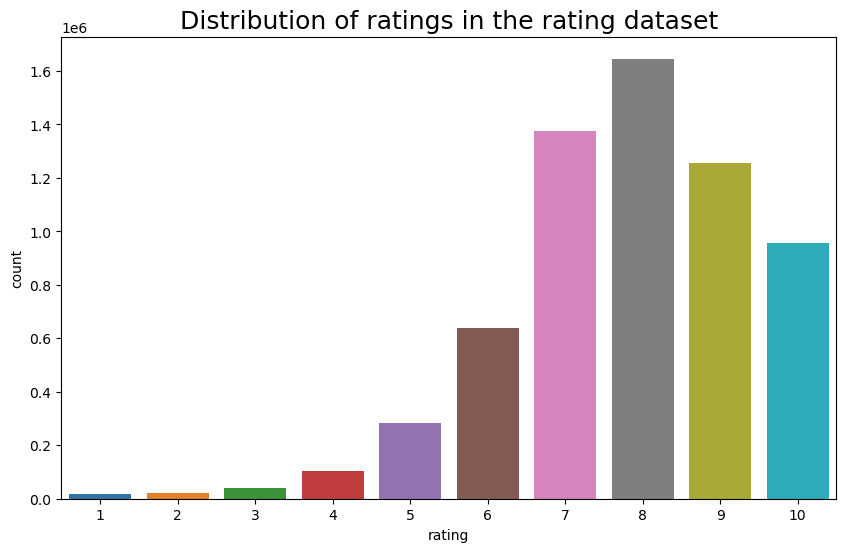

In [24]:
# Distribution of ratings after removing -1 rating
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(x="rating", data=rating_df)

plt.title(f"Distribution of ratings in the rating dataset", fontsize=18)
plt.show()

#### 6.2 Distribution of genres

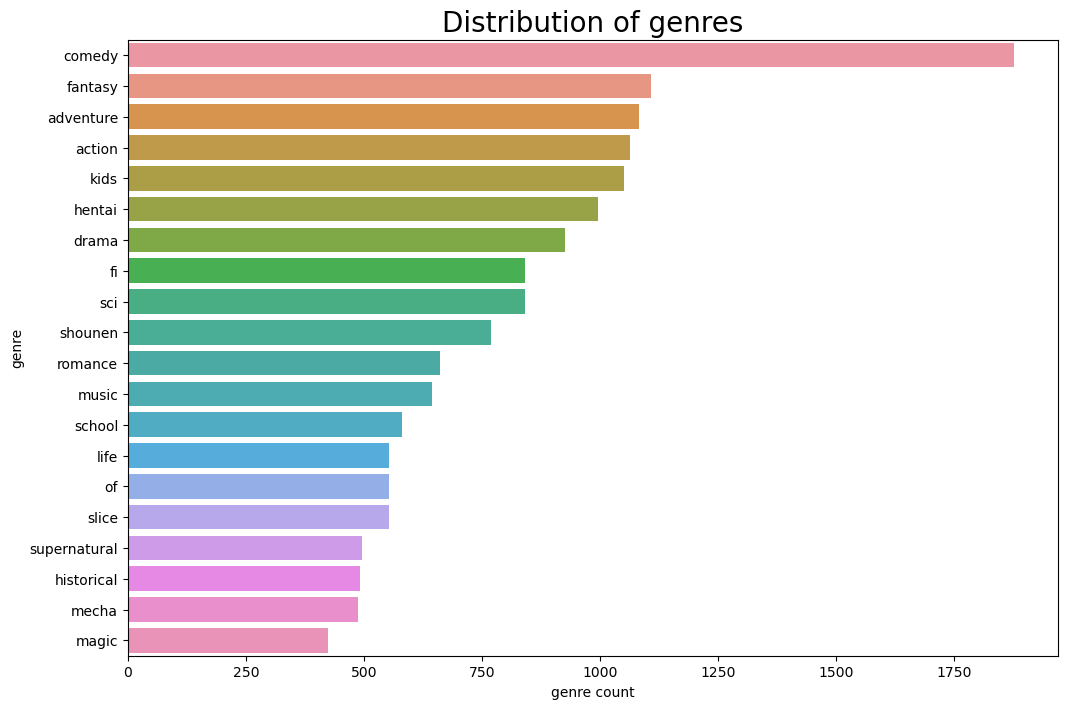

In [25]:
# Examine counts of animes by genres
n = 20
genre_df = anime_df[genres]
genre_counts_dict = helper.topn_genres(genre_df, n)

plt.figure(figsize=(12,8), dpi=100)
sns.barplot(x=list(genre_counts_dict.values()), y=list(genre_counts_dict.keys()))

plt.xlabel("genre count")
plt.ylabel("genre")
plt.title("Distribution of genres", fontsize=20)

plt.show()

#### 6.3 Distribution of episodes

In [26]:
# Unique values of episodes
anime_df["episodes"].unique()

array([   1,   64,   51,   24,   10,  148,  110,   13,  201,   25,   22,
         75,    4,   26,   12,   27,   43,   74,   37,    2,   11,   99,
         -1,   39,  101,   47,   50,   62,   33,  112,   23,    3,   94,
          6,    8,   14,    7,   40,   15,  203,   77,  291,  120,  102,
         96,   38,   79,  175,  103,   70,  153,   45,    5,   21,   63,
         52,   28,  145,   36,   69,   60,  178,  114,   35,   61,   34,
        109,   20,    9,   49,  366,   97,   48,   78,  358,  155,  104,
        113,   54,  167,  161,   42,  142,   31,  373,  220,   46,  195,
         17, 1787,   73,  147,  127,   16,   19,   98,  150,   76,   53,
        124,   29,  115,  224,   44,   58,   93,  154,   92,   67,  172,
         86,   30,  276,   59,   72,  330,   41,  105,  128,  137,   56,
         55,   65,  243,  193,   18,  191,  180,   91,  192,   66,  182,
         32,  164,  100,  296,  694,   95,   68,  117,  151,  130,   87,
        170,  119,   84,  108,  156,  140,  331,  3

In [27]:
# Only extract animes with known episdoes and convert into numeric types
anime_known_episodes = anime_df["episodes"].loc[(anime_df["episodes"]) != "Unknown"]
anime_known_episodes = pd.to_numeric(anime_known_episodes)

print(f"Min episodes: {min(anime_known_episodes)}")
print(f"Max episode: {max(anime_known_episodes)}")

Min episodes: -1
Max episode: 1818


In [28]:
# Categorise animes with known episodes into intervals of episdoes
# Group them by range/intervales of (10) episdoes and count them
episodes_by_range = pd.cut(anime_known_episodes, np.arange(0, 1840, 10), ordered=True)
episode_counts = anime_known_episodes.groupby(episodes_by_range).count()
episodes = list(episode_counts.index.astype(str))
episode_counts = list(episode_counts)

# Filter those intervals with less than 5 animes
episodes_dict = dict(zip(episodes, episode_counts))
episodes_dict = {key: item for key, item in episodes_dict.items() if item >= 5}
print(episodes_dict)

{'(0, 10]': 8145, '(10, 20]': 1592, '(20, 30]': 1004, '(30, 40]': 211, '(40, 50]': 256, '(50, 60]': 328, '(60, 70]': 46, '(70, 80]': 47, '(80, 90]': 12, '(90, 100]': 30, '(100, 110]': 38, '(110, 120]': 12, '(120, 130]': 13, '(130, 140]': 5, '(140, 150]': 10, '(150, 160]': 13, '(160, 170]': 9, '(170, 180]': 6, '(190, 200]': 8}


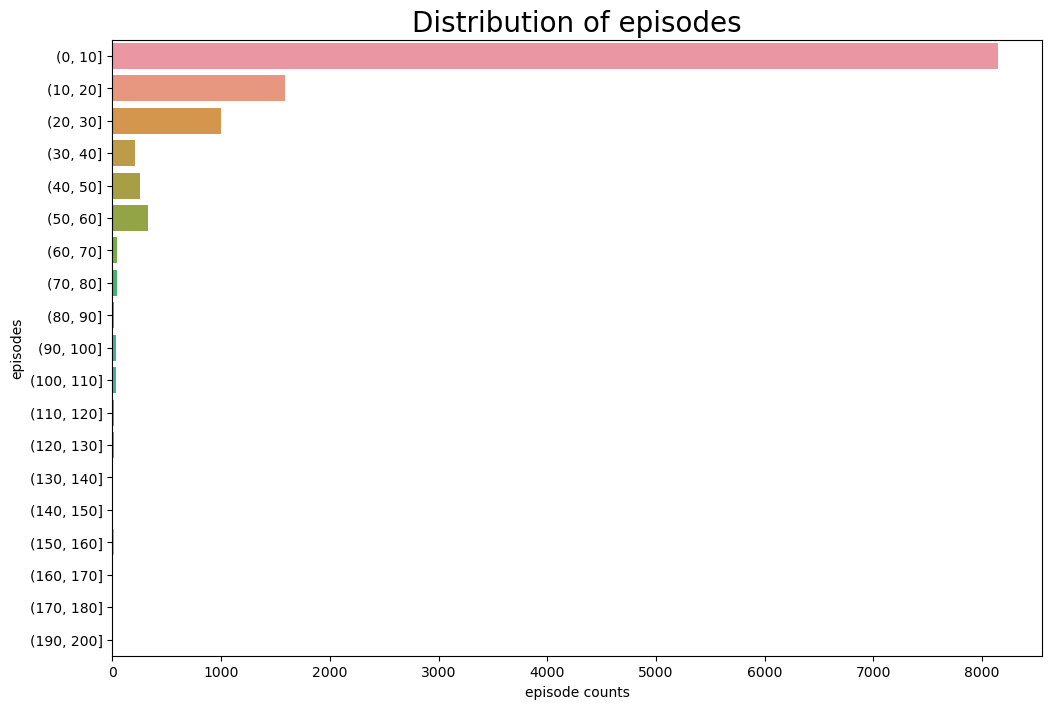

In [29]:
plt.figure(figsize=(12,8), dpi=100)
sns.barplot(x=list(episodes_dict.values()), y=list(episodes_dict.keys()))

plt.xlabel("episode counts")
plt.ylabel("episodes")
plt.title("Distribution of episodes", fontsize=20)

plt.show()

#### 6.4 Top-N most popular animes (by members in the anime community)

In [30]:
n = 20
topn_popular_animes = helper.topn_animes_by_column(anime_df, "members", n)
topn_popular_animes = helper.get_animes_by_ids(anime_df, topn_popular_animes)

topn_popular_animes_str = '\n'.join(topn_popular_animes)
print(f"Top {n} popular animes:\n\n{topn_popular_animes_str}")

Top 20 popular animes:

Fullmetal Alchemist: Brotherhood
Steins;Gate
Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch
Death Note
Shingeki no Kyojin
No Game No Life
Toradora!
Angel Beats!
Fullmetal Alchemist
Clannad
Fairy Tail
Soul Eater
Mirai Nikki (TV)
Tokyo Ghoul
Bleach
Ao no Exorcist
Elfen Lied
Sword Art Online
Naruto


#### 6.5 Top-N highest-rated animes

In [31]:
topn_highest_rated_animes = helper.topn_animes_by_column(anime_df, "rating", n)
topn_highest_rated_animes = helper.get_animes_by_ids(anime_df, topn_highest_rated_animes)

topn_highest_rated_animes_str = '\n'.join(topn_highest_rated_animes)
print(f"Top {n} higest-rated animes:\n\n{topn_highest_rated_animes_str}")

Top 20 higest-rated animes:

Kimi no Na wa.
Fullmetal Alchemist: Brotherhood
Gintama°
Steins;Gate
Gintama&#039;
Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou
Hunter x Hunter (2011)
Ginga Eiyuu Densetsu
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama&#039;: Enchousen
Clannad: After Story
Koe no Katachi
Gintama
Kahei no Umi
Mirai ni Mukete: Bousai wo Kangaeru
Mogura no Motoro
Santa-san wa Dai Isogashi
Spoon-hime no Swing Kitchen
Taka no Tsume 8: Yoshida-kun no X-Files
Yakusoku: Africa Mizu to Midori


#### 6.6 Top-N highest-rated animes by genres

In [32]:
n = 10

# Examine top n highest-rated animes for each genre
for genre in genres: 
    topn_highest_rated_animes = helper.topn_highest_rating_anime_by_feature(anime_df, genre, n)
    topn_highest_rated_genre_animes_str = '\n'.join(topn_highest_rated_animes)
    print(f"Top {n} higest-rated {genre} animes:\n\n{topn_highest_rated_genre_animes_str}")    
    print("\n")

Top 10 higest-rated action animes:

Kingsglaive: Final Fantasy XV
Brotherhood: Final Fantasy XV
Shinzou Ningen Casshern
Flag Director&#039;s Edition: Issenman no Kufura no Kiroku
Fuuma no Kojirou: Fuuma Hanran-hen
Fuuma no Kojirou: Yasha-hen
Fuuma no Kojirou: Seiken Sensou-hen
Ghost in the Shell Arise Episode: [.jp]
Bus Gamer
Uma Musume: Pretty Derby


Top 10 higest-rated adventure animes:

Tibet Inu Monogatari
Ramayana: The Legend of Prince Rama
Doraemon Movie 03: Nobita no Daimakyou
Black Jack (TV): Hizouban Specials
Seimei no Kagaku: Micro Patrol
Sanzoku no Musume Ronja
Jungle Taitei: Yuuki ga Mirai wo Kaeru
Ganbare Swimmy
Gongitsune
Telemonster


Top 10 higest-rated ai animes:




Top 10 higest-rated arts animes:




Top 10 higest-rated cars animes:

Zeonic Toyota Special Movie
Oval x Over
Homé-Pato the Movie
Four Seasons: Fuuka to Nanami
Yume no Jidousha


Top 10 higest-rated comedy animes:

Servamp Specials
Full Metal Panic! The Second Raid: Wari to Hima na Sentaichou no Ichinich

#### 6.7 Top-N highest-rated animes by types

In [33]:
# Examine top n highest-rated animes for each type
for anime_type in types: 
    topn_highest_rated_animes = helper.topn_highest_rating_anime_by_feature(anime_df, anime_type, n)
    topn_highest_rated_type_animes_str = '\n'.join(topn_highest_rated_animes)
    print(f"Top {n} higest-rated {anime_type} animes:\n\n{topn_highest_rated_type_animes_str}")    
    print("\n")

Top 10 higest-rated type_movie animes:

Kimi no Na wa.
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Koe no Katachi
Kahei no Umi
Mirai ni Mukete: Bousai wo Kangaeru
Mogura no Motoro
Okaachan Gomen ne
Shaka no Shougai
Shenmi Shijie Lixian Ji
Taka no Tsume 8: Yoshida-kun no X-Files


Top 10 higest-rated type_music animes:

Shelter
Interstella5555: The 5tory of The 5ecret 5tar 5ystem
The Everlasting Guilty Crown
CLAMP in Wonderland 2
Snow Halation
On Your Mark
One More Time, One More Chance
Perfect Day
Higashi no Eden: Falling Down
Nowisee


Top 10 higest-rated type_ona animes:

Eve no Jikan
There She Is!!
Elsword: El Lady
Mobile Suit Gundam Thunderbolt
Hetalia: The Beautiful World
Hetalia World Series
Ansatsu Kyoushitsu (TV) 2nd Season: Kagaijugyou-hen
Huyao Xiao Hongniang: Yue Hong
Hua Jiang Hu Zhi Bu Liang Ren
Yong Zhe Da Mao Xian


Top 10 higest-rated type_ova animes:

Ginga Eiyuu Densetsu
Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen
Gintama°: Aizome Kaori-hen
Kie Saran

#### 6.8 Top-N most popular animes by genres

In [34]:
# Examine top n most popular animes for each genre
for genre in genres: 
    topn_popular_animes = helper.topn_most_popular_anime_by_feature(anime_df, genre, n)
    topn_popular_genre_animes_str = '\n'.join(topn_popular_animes)
    print(f"Top {n} most_popular {genre} animes:\n\n{topn_popular_genre_animes_str}")    
    print("\n")

Top 10 most_popular action animes:

Kingsglaive: Final Fantasy XV
Brotherhood: Final Fantasy XV
Shinzou Ningen Casshern
Ghost in the Shell Arise Episode: [.jp]
Bus Gamer
Sonic: Night of the WereHog
Ninja Slayer From Animation
Trigger-chan
Ark IX
Ragnastrike Angels


Top 10 most_popular adventure animes:

Tibet Inu Monogatari
Black Jack (TV): Hizouban Specials
Sanzoku no Musume Ronja
Ryuusei no Rockman Tribe
Cross Fight B-Daman
Jumping
Kujiratori
Chocolate Underground: Bokura no Chocolate Sensou
Ookii 1 Nensei to Chiisana 2 Nensei
Cowboy Bebop: Ein no Natsuyasumi


Top 10 most_popular ai animes:




Top 10 most_popular arts animes:




Top 10 most_popular cars animes:

Zeonic Toyota Special Movie
Oval x Over
Homé-Pato the Movie
Four Seasons: Fuuka to Nanami
Yume no Jidousha


Top 10 most_popular comedy animes:

Full Metal Panic! The Second Raid: Wari to Hima na Sentaichou no Ichinichi
Pandora Hearts Specials
Steins;Gate: Soumei Eichi no Cognitive Computing
Amagi Brilliant Park: Nonbiris

#### 6.9 Top-N most popular animes by types

In [35]:
# Examine top n most popular animes for each type
for anime_type in types: 
    topn_popular_animes = helper.topn_most_popular_anime_by_feature(anime_df, anime_type, n)
    topn_popular_type_animes_str = '\n'.join(topn_popular_animes)
    print(f"Top {n} most popular {anime_type} animes:\n\n{topn_popular_animes_str}")    
    print("\n")

Top 10 most popular type_movie animes:

Fullmetal Alchemist: Brotherhood
Steins;Gate
Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch
Death Note
Shingeki no Kyojin
No Game No Life
Toradora!
Angel Beats!
Fullmetal Alchemist
Clannad
Fairy Tail
Soul Eater
Mirai Nikki (TV)
Tokyo Ghoul
Bleach
Ao no Exorcist
Elfen Lied
Sword Art Online
Naruto


Top 10 most popular type_music animes:

Fullmetal Alchemist: Brotherhood
Steins;Gate
Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch
Death Note
Shingeki no Kyojin
No Game No Life
Toradora!
Angel Beats!
Fullmetal Alchemist
Clannad
Fairy Tail
Soul Eater
Mirai Nikki (TV)
Tokyo Ghoul
Bleach
Ao no Exorcist
Elfen Lied
Sword Art Online
Naruto


Top 10 most popular type_ona animes:

Fullmetal Alchemist: Brotherhood
Steins;Gate
Code Geass: Hangyaku no Lelouch R2
Code Geass: Hangyaku no Lelouch
Death Note
Shingeki no Kyojin
No Game No Life
Toradora!
Angel Beats!
Fullmetal Alchemist
Clannad
Fairy Tail
Soul Eater
Mirai Nikki (

#### 6.10 Distribution of ratings count by users

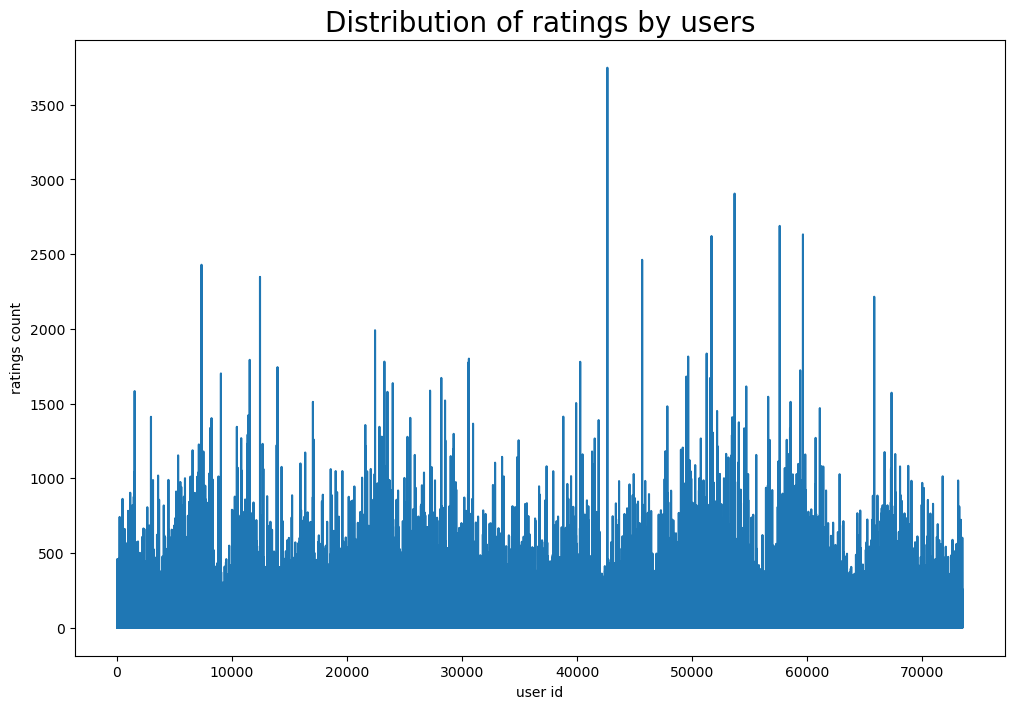

In [36]:
# Get the rating counts by users
ratings_count_by_user = rating_df.groupby(by="user_id")["user_id"].count()

plt.figure(figsize=(12,8), dpi=100)
ratings_count_by_user.plot()

plt.xlabel("user id")
plt.ylabel("ratings count")
plt.title(f"Distribution of ratings by users", fontsize=20)
plt.show()


#### 6.11 Distribution of average rating by users

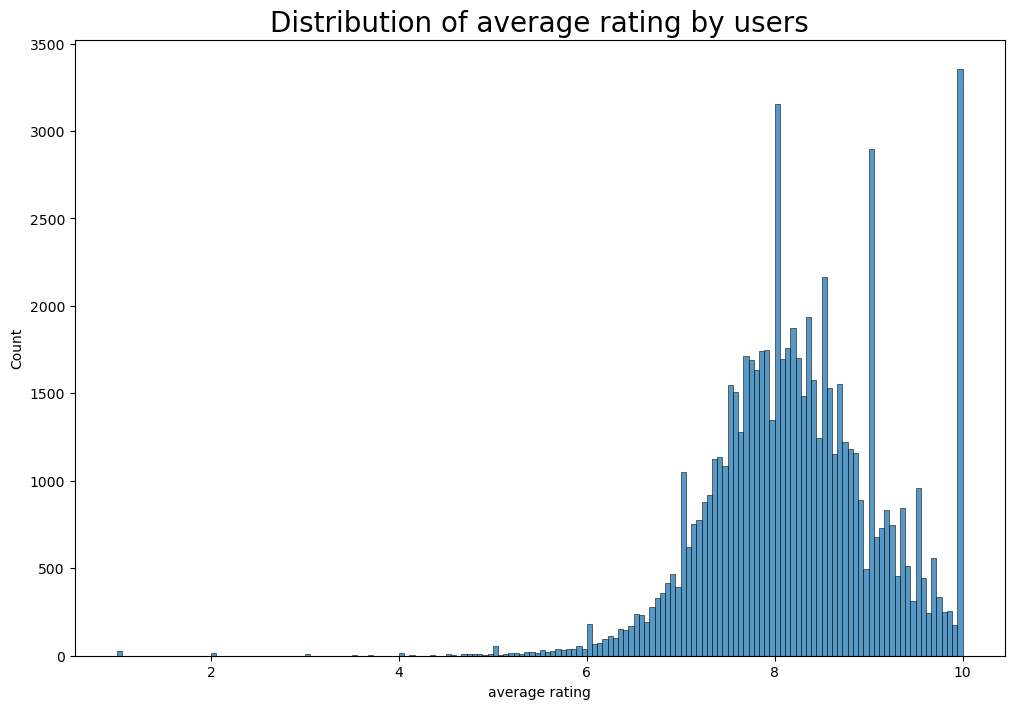

In [37]:
# Get the average rating by each user
average_rating_by_users = rating_df.groupby(by="user_id")["rating"].mean()

plt.figure(figsize=(12,8), dpi=100)
sns.histplot(list(average_rating_by_users))

plt.xlabel("average rating")
plt.title(f"Distribution of average rating by users", fontsize=20)
plt.show()

### 7. Data normalisation
Numeric columns such as 'episodes', 'rating', and 'members' have far higher values compared to the rest of numeric columns. The lack of data uniformity may adversely impact the further analysis and model evaluation. Therefore, data normalisation is applied to the dataset so that these data can bring greather context and accuracy to the recommendation model. 

In [38]:
# Normalise all numeric columns except anime_id column
normalised_anime_df = helper.normalised_data(anime_df, drop_columns=["anime_id", "name"])
normalised_anime_df.head()

,anime_id,name,episodes,rating,members,action,adventure,ai,arts,cars,...,thriller,vampire,yaoi,yuri,type_movie,type_music,type_ona,type_ova,type_special,type_tv
0,32281,Kimi no Na wa.,0.001100,0.924370,0.197867,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5114,Fullmetal Alchemist: Brotherhood,0.035734,0.911164,0.782769,0.294985,0.316287,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28977,Gintama°,0.028587,0.909964,0.112683,0.251618,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,9253,Steins;Gate,0.013744,0.900360,0.664323,0.000000,0.000000,0.0,0.0,0.0,...,0.833852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9969,Gintama&#039;,0.028587,0.899160,0.149180,0.251618,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
# Rename columns to avoid multiindex
normalised_anime_df = normalised_anime_df.rename(columns={"episodes": "norm_episodes", "rating": "norm_rating", "members": "norm_members"})
anime_df = pd.concat([anime_df, normalised_anime_df[["norm_episodes", "norm_rating", "norm_members"]]], axis=1)

### 8. Writing preprocessed dataframes to csv files

In [40]:
# Check dataframes
anime_df

,anime_id,name,episodes,rating,members,action,adventure,ai,arts,cars,...,yuri,type_movie,type_music,type_ona,type_ova,type_special,type_tv,norm_episodes,norm_rating,norm_members
0,32281,Kimi no Na wa.,1,9.37,200630,0.000000,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.001100,0.924370,0.197867
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0.294985,0.316287,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.035734,0.911164,0.782769
2,28977,Gintama°,51,9.25,114262,0.251618,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028587,0.909964,0.112683
3,9253,Steins;Gate,24,9.17,673572,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.013744,0.900360,0.664323
4,9969,Gintama&#039;,51,9.16,151266,0.251618,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.028587,0.899160,0.149180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001100,0.297719,0.000196
12013,5543,Under World,1,4.28,183,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001100,0.313325,0.000169
12014,5621,Violence Gekiga David no Hoshi,4,4.88,219,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.002749,0.385354,0.000204
12015,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.001100,0.397359,0.000161


In [41]:
rating_df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813731,73515,16512,7
7813732,73515,17187,9
7813733,73515,22145,10
7813734,73516,790,9


In [42]:
# Write to csv files
anime_path = "cleaned_anime.csv"
rating_path = "cleaned_rating.csv"

anime_df.to_csv(anime_path, index=False)
rating_df.to_csv(rating_path, index=False)